In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


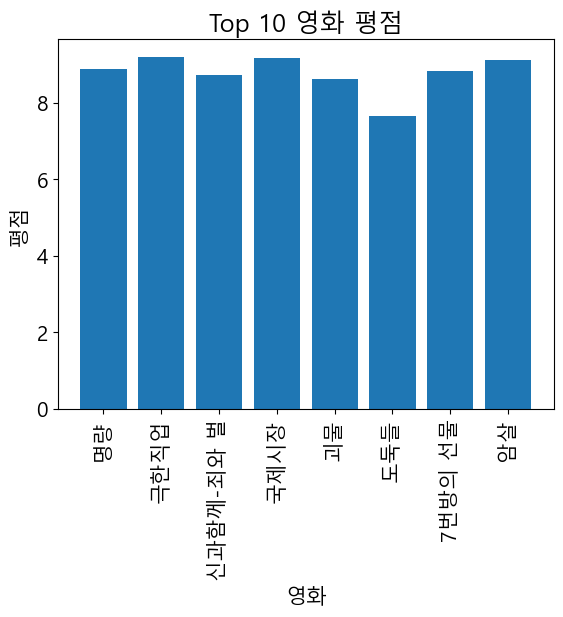

In [3]:
# 영화데이터를 x축은 영화, y축은 평점인 막대그래프


plt.bar(df['영화'], df['평점'])
plt.title('Top 10 영화 평점')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation=90)
plt.show()

In [4]:
df_group = df.groupby('개봉 연도')[['관객 수','평점']].mean()
df_group.reset_index(level=['개봉 연도'], inplace=True)


In [5]:
df_group

,개봉 연도,관객 수,평점
0,2006,1301.0,8.62
1,2012,1298.0,7.64
2,2013,1281.0,8.83
3,2014,1593.5,9.02
4,2015,1270.0,9.10
5,2017,1441.0,8.73
6,2019,1626.0,9.20


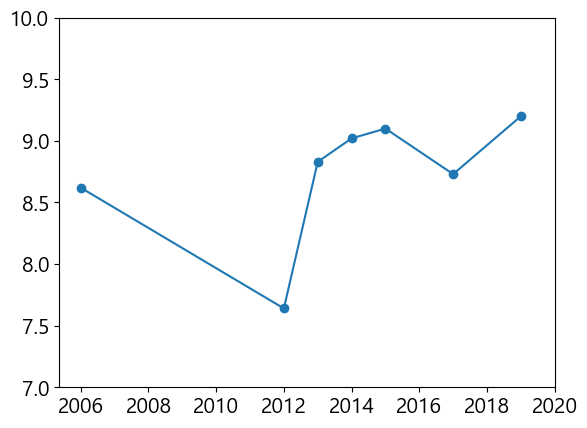

In [6]:

plt.plot(df_group['개봉 연도'], df_group['평점'], marker='o')
plt.ylim(7, 10)
plt.xticks([2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
plt.show()

In [7]:
df_group['평점평가'] = '9점 이상'
df_group.loc[df_group['평점']<9, ['평점평가']]='9점 미만'
df_group

,개봉 연도,관객 수,평점,평점평가
0,2006,1301.0,8.62,9점 미만
1,2012,1298.0,7.64,9점 미만
2,2013,1281.0,8.83,9점 미만
3,2014,1593.5,9.02,9점 이상
4,2015,1270.0,9.10,9점 이상
5,2017,1441.0,8.73,9점 미만
6,2019,1626.0,9.20,9점 이상


In [8]:
grps = df_group.groupby('평점평가')
grps

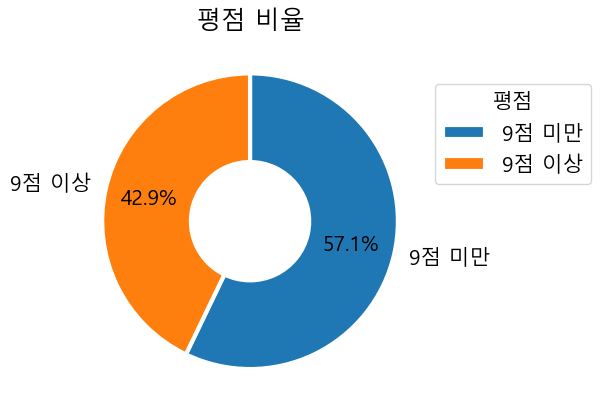

In [9]:
values = [grps.size()['9점 미만'], grps.size()['9점 이상']]
labels = ['9점 미만', '9점 이상']
wedgeprops = {'width':0.6, 'edgecolor':'w', 'linewidth':3}
plt.pie(values, labels= labels, autopct='%.1f%%', startangle=90, counterclock=False,  wedgeprops=wedgeprops, pctdistance=0.7)
plt.legend(loc=(1.0, 0.6), title = '평점')
plt.title('평점 비율')

plt.show()